In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

In [5]:
df_compact = pd.read_csv('./rpi_data_compact.csv')
df_compact

,Unnamed: 0,Ping (ms),Download (Mbit/s),Upload (Mbit/s),Date,Time
0,0,26.992,91.80,14.31,2016-11-24,13:36:25
1,1,24.532,88.19,14.12,2016-11-24,13:36:55
2,2,20.225,59.86,14.11,2016-11-24,13:37:25
3,3,19.332,91.81,14.22,2016-11-24,13:37:57
4,4,22.494,92.05,14.08,2016-11-24,13:38:27
...,...,...,...,...,...,...
675,675,retrieve,2016-11-24 19:18:03,NaN,NaN,NaN
676,676,retrieve,2016-11-24 19:18:06,NaN,NaN,NaN
677,677,retrieve,2016-11-24 19:18:10,NaN,NaN,NaN
678,678,retrieve,2016-11-24 19:18:13,NaN,NaN,NaN


In [7]:
df_compact.head()

,Unnamed: 0,Ping (ms),Download (Mbit/s),Upload (Mbit/s),Date,Time
0,0,26.992,91.80,14.31,2016-11-24,13:36:25
1,1,24.532,88.19,14.12,2016-11-24,13:36:55
2,2,20.225,59.86,14.11,2016-11-24,13:37:25
3,3,19.332,91.81,14.22,2016-11-24,13:37:57
4,4,22.494,92.05,14.08,2016-11-24,13:38:27


In [9]:
df_compact.describe

<bound method NDFrame.describe of      Unnamed: 0 Ping (ms)    Download (Mbit/s)  Upload (Mbit/s)        Date  \
0             0    26.992                91.80            14.31  2016-11-24   
1             1    24.532                88.19            14.12  2016-11-24   
2             2    20.225                59.86            14.11  2016-11-24   
3             3    19.332                91.81            14.22  2016-11-24   
4             4    22.494                92.05            14.08  2016-11-24   
..          ...       ...                  ...              ...         ...   
675         675  retrieve  2016-11-24 19:18:03              NaN         NaN   
676         676  retrieve  2016-11-24 19:18:06              NaN         NaN   
677         677  retrieve  2016-11-24 19:18:10              NaN         NaN   
678         678  retrieve  2016-11-24 19:18:13              NaN         NaN   
679         679    22.175                85.69            14.23  2016-11-24   

         Time  
0

In [12]:
NaNs_in_df = df_compact.isnull()
NaNs_in_df

,Unnamed: 0,Ping (ms),Download (Mbit/s),Upload (Mbit/s),Date,Time
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
675,False,False,False,True,True,True
676,False,False,False,True,True,True
677,False,False,False,True,True,True
678,False,False,False,True,True,True


In [15]:
NaNs_per_col = NaNs_in_df.sum()
print(type(NaNs_per_col))
NaNs_per_col.head()

<class 'pandas.core.series.Series'>


Unnamed: 0           0
Ping (ms)            1
Download (Mbit/s)    1
Upload (Mbit/s)      7
Date                 7
dtype: int64

In [18]:
NaNs_total = df_compact.isnull().sum().sum()
NaNs_total

23

In [22]:
NaNs_pct = np.round(df_compact.isnull().sum().sum() / float(len(df_compact) * len(df_compact.columns))*100, decimals=4) # pct

print('The DataFrame contains : {} NaNs, equal to {} of the measurements'.format(NaNs_total, NaNs_pct)) 

The DataFrame contains : 23 NaNs, equal to 0.5637 of the measurements


In [25]:
df_compact_clean = df_compact.dropna() # fuck the NaNs

In [27]:
df_compact.dtypes

Unnamed: 0             int64
Ping (ms)             object
Download (Mbit/s)     object
Upload (Mbit/s)      float64
Date                  object
Time                  object
dtype: object

In [28]:
str_val = '10.56'
float_val = float(str_val)
print(str_val, type(str_val), float_val, type(float_val))

10.56 <class 'str'> 10.56 <class 'float'>


In [31]:
df_compact_clean = df_compact_clean.reindex(columns = ['Date', 'Time', 'Ping (ms)','Download (Mbit/s)','Upload (Mbit/s)']); #reindex to position upload as last column
df_compact_clean.head()

,Date,Time,Ping (ms),Download (Mbit/s),Upload (Mbit/s)
0,2016-11-24,13:36:25,26.992,91.80,14.31
1,2016-11-24,13:36:55,24.532,88.19,14.12
2,2016-11-24,13:37:25,20.225,59.86,14.11
3,2016-11-24,13:37:57,19.332,91.81,14.22
4,2016-11-24,13:38:27,22.494,92.05,14.08


In [34]:
df_compact_clean.to_csv('./rpi_data_processed.csv', index=False)

df_clean = df_compact_clean
df_clean

,Date,Time,Ping (ms),Download (Mbit/s),Upload (Mbit/s)
0,2016-11-24,13:36:25,26.992,91.80,14.31
1,2016-11-24,13:36:55,24.532,88.19,14.12
2,2016-11-24,13:37:25,20.225,59.86,14.11
3,2016-11-24,13:37:57,19.332,91.81,14.22
4,2016-11-24,13:38:27,22.494,92.05,14.08
...,...,...,...,...,...
668,2016-11-24,19:15:32,20.952,88.67,14.35
669,2016-11-24,19:16:04,19.397,84.86,14.35
670,2016-11-24,19:16:34,20.117,84.99,14.33
671,2016-11-24,19:17:04,17.995,86.21,6.88


In [58]:
means = {}
stands = {}
for item in df_compact.columns: 
    means[item]= (df_compact[item].mean)
    stands[item] = df_compact[item].std
means

{'Unnamed: 0': <bound method Series.mean of 0        0
 1        1
 2        2
 3        3
 4        4
       ... 
 675    675
 676    676
 677    677
 678    678
 679    679
 Name: Unnamed: 0, Length: 680, dtype: int64>,
 'Ping (ms)': <bound method Series.mean of 0        26.992
 1        24.532
 2        20.225
 3        19.332
 4        22.494
          ...   
 675    retrieve
 676    retrieve
 677    retrieve
 678    retrieve
 679      22.175
 Name: Ping (ms), Length: 680, dtype: object>,
 'Download (Mbit/s)': <bound method Series.mean of 0                    91.80
 1                    88.19
 2                    59.86
 3                    91.81
 4                    92.05
               ...         
 675    2016-11-24 19:18:03
 676    2016-11-24 19:18:06
 677    2016-11-24 19:18:10
 678    2016-11-24 19:18:13
 679                  85.69
 Name: Download (Mbit/s), Length: 680, dtype: object>,
 'Upload (Mbit/s)': <bound method Series.mean of 0      14.31
 1      14.12
 2      14.11

In [61]:


stats_ping = (means['Ping (ms)'], stands['Ping (ms)'])
stats_download = (means['Download (Mbit/s)'], stands['Download (Mbit/s)'])
stats_upload = (means['Upload (Mbit/s)'], stands['Upload (Mbit/s)'])

# Print the mean value ± the standard deviation, including measuring units
print('Average ping time: {} ± {} ms'.format(stats_ping[0],stats_ping[1]))
print('Average download speed: {} ± {} Mbit/s'.format(*stats_download))
print('Average upload speed: {} ± {} Mbit/s'.format(*stats_upload))

Average ping time: <bound method Series.mean of 0        26.992
1        24.532
2        20.225
3        19.332
4        22.494
         ...   
675    retrieve
676    retrieve
677    retrieve
678    retrieve
679      22.175
Name: Ping (ms), Length: 680, dtype: object> ± <bound method Series.std of 0        26.992
1        24.532
2        20.225
3        19.332
4        22.494
         ...   
675    retrieve
676    retrieve
677    retrieve
678    retrieve
679      22.175
Name: Ping (ms), Length: 680, dtype: object> ms
Average download speed: <bound method Series.mean of 0                    91.80
1                    88.19
2                    59.86
3                    91.81
4                    92.05
              ...         
675    2016-11-24 19:18:03
676    2016-11-24 19:18:06
677    2016-11-24 19:18:10
678    2016-11-24 19:18:13
679                  85.69
Name: Download (Mbit/s), Length: 680, dtype: object> ± <bound method Series.std of 0                    91.80
1                

In [62]:
# Code Cell 23
# Compute max and min for all the columns of df_compact
mins = df_clean.min()
maxs = df_clean.max()

# Place mean and std for each column in a tuple
mima_ping = (mins['Ping (ms)'], maxs['Ping (ms)'])
mima_download = (mins['Download (Mbit/s)'], maxs['Download (Mbit/s)'])
mima_upload = (mins['Upload (Mbit/s)'], maxs['Upload (Mbit/s)'])

# Print the mean and max values, including measuring units
print('Min ping time: {} ms. Max ping time: {} ms'.format(*mima_ping))
print('Min download speed: {} Mbit/s. Max download speed: {} Mbit/s'.format(*mima_download))
print('Min upload speed: {} Mbit/s. Max upload speed: {} Mbit/s'.format(*mima_upload))

Min ping time: 16.167 ms. Max ping time: 76.528 ms
Min download speed: 58.48 Mbit/s. Max download speed: 92.87 Mbit/s
Min upload speed: 6.21 Mbit/s. Max upload speed: 14.55 Mbit/s


In [64]:
df_clean.describe()

,Upload (Mbit/s)
count,673.000000
mean,13.697608
std,1.080471
min,6.210000
25%,13.640000
50%,13.980000
75%,14.180000
max,14.550000


In [66]:
argmin_ping = df_clean['Ping (ms)'].argmin()
argmax_ping = df_clean['Ping (ms)'].argmax()

# Find the min and max download speed
argmin_download = df_clean['Download (Mbit/s)'].argmin()
argmax_download = df_clean['Download (Mbit/s)'].argmax()

# Find the min and max upload speed
argmin_upload = df_clean['Upload (Mbit/s)'].argmin()
argmax_upload = df_clean['Upload (Mbit/s)'].argmax()

C:\Users\Fabian\AppData\Local\Programs\Python\Python36\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 
The current behaviour of 'Series.argmin' is deprecated, use 'idxmin'
instead.
The behavior of 'argmin' will be corrected to return the positional
minimum in the future. For now, use 'series.values.argmin' or
'np.argmin(np.array(values))' to get the position of the minimum
row.
  """Entry point for launching an IPython kernel.


TypeError: reduction operation 'argmin' not allowed for this dtype

In [67]:
# Code Cell 26
# Create a small DataFrame and access its rows using iloc

# A pandas DataFrame can be initialized passing a dict as a parameter to the constructor pd.DataFrame(). 
# The key will represent the column, the values the rows.
df = pd.DataFrame({'field_1': [0,1], 'field_2': [0,2]})
df.head()

,field_1,field_2
0,0,0
1,1,2


In [68]:
df.iloc[1]['field_1']

1

In [71]:
# Code Cell 28
#Print the corresponding Date and Time
#print('Ping measure reached minimum on {} at {}'.format(df_clean.loc[..., 
#                                                        df_clean.loc[...))

#print('Download measure reached minimum on {} at {}'.format(...

#print('Upload measure reached minimum on ...

#print('Ping measure reached maximum on ... 

#print('Download measure reached maximum on ...

#print('Upload measure reached maximum on ...

In [72]:
df_corr = df_clean.corr()
df_corr

,Upload (Mbit/s)
Upload (Mbit/s),1.0


In [73]:
corr = df_corr.values
print('Correlation coefficient between ping and download: {}'.format(corr[0, 1]))
print('Correlation coefficient between ping and upload: {}'.format(corr[0, 2]))
print('Correlation coefficient between upload and download: {}'.format(corr[2, 1]))

IndexError: index 1 is out of bounds for axis 1 with size 1

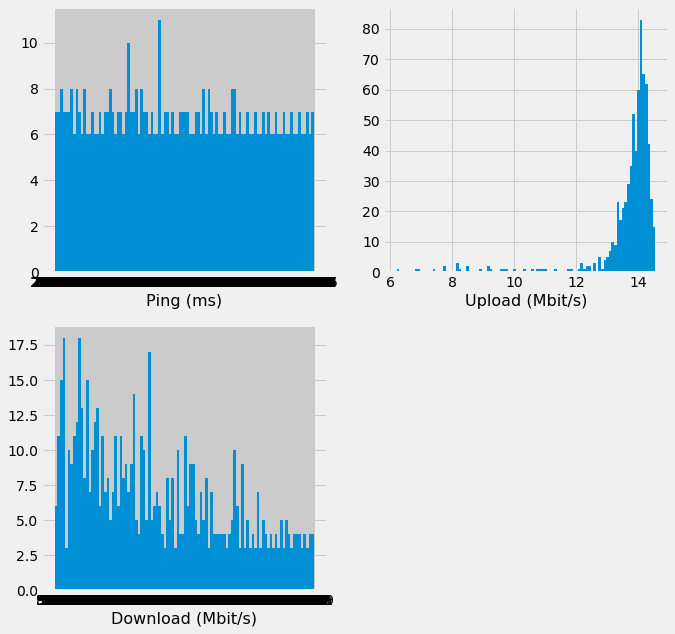

In [74]:
# Code Cell 37
with plt.style.context('fivethirtyeight'):
    
    nbins = 100
    # Initialize figure
    fig, ax = plt.subplots(2, 2, figsize=(10, 10))
    ax[0][0].hist(df_clean['Ping (ms)'], nbins)
    ax[0][0].set_xlabel('Ping (ms)', fontsize=16)
    ax[0][0].tick_params(labelsize=14)
    ax[0][1].hist(df_clean['Upload (Mbit/s)'], nbins)
    ax[0][1].set_xlabel('Upload (Mbit/s)', fontsize=16)
    ax[0][1].tick_params(labelsize=14)
    ax[1][0].hist(df_clean['Download (Mbit/s)'], nbins)
    ax[1][0].set_xlabel('Download (Mbit/s)', fontsize=16)
    ax[1][0].tick_params(labelsize=14)
    ax[1][1].set_visible(False)